# Prediction

We have so far focused on estimation of $\beta$ and inference on functions of $\beta$ in the model:

$$ y_i = X_i' \beta + \epsilon_i, \qquad \mathbb{E}[\epsilon_i |X_i] = 0$$

Another common task is prediction. Lets say we wish to predict some variable $y\in \R$, based on the variables $X = (X_1, \ldots, X_K)$.

One prediction rule, based on the linear regression model we have already studied is the rule $y = X' \hat{\beta}$.

How do we evaluate predictors?

The most commonly used criterion is the mean squared error or MSE. For a given prediction rule $f(X)$, the MSE is 

$$ MSE(f) = \mathbb{E}\left[y - f(X)\right]^2 $$

It turns out that this is minimised by $f(X) = \mathbb{E}[y|X]$.

There is an important special case when this will coincide with the OLS prediction: if the linear model above is true. In the context of prediction this is often written in the alternative (but equivalent) form:

$$ \mathbb{E}[y_i | X_i] = X_i' \beta $$

In this case, the optimal prediction rule is just $f(X) = X' \beta$. Of course, we do not know $\beta$ but we can replace it with $\hat{\beta}$.

In [116]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Load Boston housing dataset

df = sm.datasets.get_rdataset("Boston", "MASS").data
df = sm.add_constant(df)
df.head()

,const,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,1.0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,1.0,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,1.0,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,1.0,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


This dataset contains median values of house price values in Boston, "medv" and a number of factors which may influence house prices. 

We'll split the data into two parts: one part to fit our model on and a second part to evaluate the model on.

In [117]:
# Split into training and test samples

ratio = 0.2
n = df.shape[0]
n_test = int(np.floor(ratio * n))
n_train = n - n_test

ind_test = np.random.choice(range(n), size = n_test, replace=False)
df_test = df.iloc[ind_test, :]
df_train = df.loc[~df.index.isin(ind_test), :]

# Fit model
mod = sm.OLS(df_train.loc[:, "medv"], df_train.loc[:, [x for x in df_train.columns if x != "medv"]]).fit()
mod.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     87.24
Date:                Sun, 09 Oct 2022   Prob (F-statistic):          8.24e-107
Time:                        11:16:32   Log-Likelihood:                -1195.5
No. Observations:                 405   AIC:                             2419.
Df Residuals:                     391   BIC:                             2475.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.4539      5.597      6.156      0.000      23.450      45.457
crim          -0.0773      0.041     -1.879      0.061      -0.158       0.004
zn             0.0487      0.015      3.342      0.001       0.020       0.077
indus          0.0561      0.068      0.829      0.408      -0.077       0.189
chas           1.8323      1.023      1.791      0.074      -0.179       3.844
nox          -17.2680      4.201     -4.111      0.000     -25.527      -9.009
rm             4.0357      0.457      8.837      0.000       3.138       4.933
age            0.0007      0.015      0.050      0.960      -0.028       0.030
dis           -1.4003      0.220     -6.377      0.000      -1.832      -0.969
rad            0.2507      0.074      3.375      0.001       0.105       0.397
tax           -0.0119      0.004     -2.829      0.005      -0.020      -0.004
ptratio       -0.9989      0.143     -6.985      0.000      -1.280      -0.718
black          0.0101      0.003      3.193      0.002       0.004       0.016
lstat         -0.4933      0.055     -8.960      0.000      -0.602      -0.385
==============================================================================
Omnibus:                      144.462   Durbin-Watson:                   1.129
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              682.530
Skew:                           1.478   Prob(JB):                    6.17e-149
Kurtosis:                       8.631   Cond. No.                     1.48e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.48e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Now lets evaluate our prediction error:

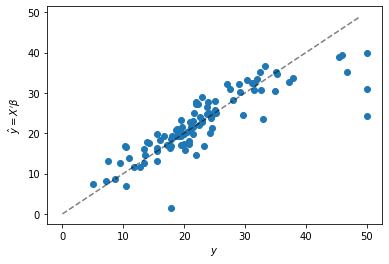

MSE =  24.65185474485358


In [118]:
fig, ax = plt.subplots()
ax.scatter(df_test.loc[:, "medv"], mod.predict(df_test.loc[:, [x for x in df_train.columns if x != "medv"]]))
ax.plot(range(50), range(50), linestyle = "--", color = "black", alpha = 0.5)
ax.set_xlabel(r"$y$")
ax.set_ylabel(r"$\hat{y} = X' \beta$")
plt.show()

err = np.square(df_test.loc[:, "medv"] - mod.predict(df_test.loc[:, [x for x in df_train.columns if x != "medv"]])).mean()
print("MSE = ", err)

Even if we assume a linear model, we need not use the OLS estimator of $\beta$ in our prediction rule. There are other estimators which can beat the OLS estimator in terms of MSE in certain situations. Additionally, many of these allow us to have more covariates than observations - which OLS does not allow. 

The performance gains over OLS come by exploiting what is called the "bias - variance tradeoff". We can decompose the (mean - squared) error in estimating $\beta$ into two parts:

$$ \mathbb{E}[\check{\beta} - \beta] = (\mathbb{E}[\check{\beta}] - \beta)^2 + \operatorname{Var}(\check{\beta}) $$

The OLS estimator of $\beta$ is unbiased (under conditions we discussed in the lectures). We may however be able to do better by using a biased estimator with smaller variance, if the amount of bias it adds is small relative to the reduction in the variance.

One general principle for doing this is called "regularisation" or "penalisation". Rather than estimating $\beta$ as the solution which minimises

$$ \|y - X\beta \|^2$$

instead we minimise

$$ \|y - X\beta \|^2 + \lambda \text{pen}(\beta)$$

where $\lambda$ is the _penalty parameter_ and $\text{pen}$ is a _penalty function_ which penalises certain aspects of $\beta$. The two most commonly used penalty functions are (functions of) norms:

$$\text{pen}(\beta) = \|\beta\|_1 \qquad \text{ or } \qquad \text{pen}(\beta) = \|\beta\|^2_2$$

The former leads to the LASSO estimator and the latter to the Ridge estimator.

The Ridge estimator has an explicit form (just like OLS):

$$\check{\beta} = (X'X + \lambda I)^{-1} X'y $$

Below we plot the mean squared error in estimating $\beta$ (and its decomposition into bias squared and variance) of the ridge estimator against the mean squared error of the OLS estimator:

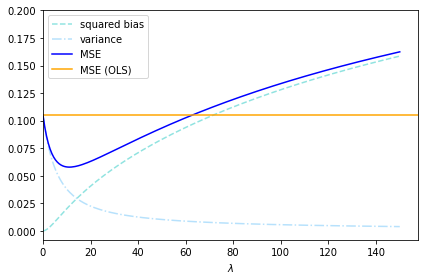

In [5]:

np.random.seed(5234)

n = 400
K = 4
beta = np.random.uniform(size = K)
A = np.random.standard_normal((K, K))
Omega = A @ A.T / 4
I_K = np.eye(K)

X =  np.random.standard_normal((n, K)) @ np.linalg.cholesky(Omega).T
X /= X.std(axis=0) # normalise scales
XX = X.T @ X

sigma = 1.0
Sigma_ols = sigma * np.linalg.solve(XX, I_K)
mse_ols = np.diag(Sigma_ols).sum()

lambdas = np.linspace(0, 150, 201)
bias_ridge = np.array([np.linalg.norm(-lambd *  np.linalg.solve(XX + lambd * I_K, beta)) for lambd in lambdas])
var_ridge = np.array([sigma * np.diag(np.linalg.solve(XX + lambd * I_K, XX) @ np.linalg.solve(XX + lambd * I_K, I_K)).sum() for lambd in lambdas])

fig, ax = plt.subplots()
ax.plot(lambdas, bias_ridge**2, color = "mediumturquoise", alpha = 0.6, linestyle = "--", label = "squared bias")
ax.plot(lambdas, var_ridge, color = "lightskyblue", alpha = 0.6, linestyle = "-.", label = "variance")
ax.plot(lambdas, bias_ridge**2 + var_ridge, color = "blue", label = "MSE")
ax.axhline(mse_ols, color = "orange", label = "MSE (OLS)")
plt.xlim(left = 0)
plt.ylim(top = 0.2)
plt.legend()
plt.xlabel(r"$\lambda$")
plt.tight_layout()
plt.show()

One important aspect of penalised estimation is the choice of the penality parameter $\lambda$.

A common way to do this -- which we will discuss further in the lecture -- is $K$-fold cross validation. This entails splitting the data into $K$ roughly equally sized groups and estimating the prediction for any observation in the $k$-th group on the other $K-1$ groups. We then evaluate our error for the prediction rules implied by different values of $\lambda$ and choose the $\lambda$ which yields the smallest error.

The choice of $K = n$ is called "leave one out cross validation" since the estimate for observation $i$ is trained on all except the $i$-th observation. 

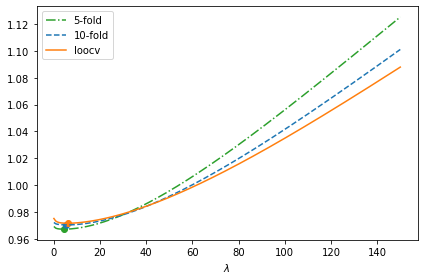

In [20]:
# Demonstration of k-fold CV and LOOCV

def get_folds(n, k):
    a = np.arange(n)
    d = n % k
    folds = []
    for i in range(k):
        if k < d:
            np.random.choice(a, n // k + 1, replace = False)
        else:
            b = np.random.choice(a, n // k, replace = False)
        a = np.setdiff1d(a, b)
        folds.append(b)
    return folds

def get_mse(y, X, lambdas, folds):
    n = y.shape[0]
    K = X.shape[1]
    I_K = np.eye(K)
    mse = np.zeros(len(lambdas))
    for (i, test) in enumerate(folds):
        train = np.concatenate(folds[:i] + folds[(i+1):])
        XX = X[train, :].T @ X[train, :]
        Xy = X[train, :].T @ y[train]
        mse += np.array([np.square(y[test] - X[test, :] @ np.linalg.solve(XX + lambd * I_K, Xy)).sum() for lambd in lambdas])
    return mse / n

np.random.seed(15143)

n = 400
K = 4
beta = np.random.uniform(size = K)
A = np.random.standard_normal((K, K))
Omega = A @ A.T / 4

X =  np.random.standard_normal((n, K)) @ np.linalg.cholesky(Omega).T
e = np.random.standard_normal(n)
y = X @ beta + e

X /= X.std(axis=0) # normalise scales

lambdas = np.linspace(0, 150, 201)

k = 5
folds = get_folds(n, k)
mse_fivefold = get_mse(y, X, lambdas, folds)
lambd_fivefold_ind = mse_fivefold.argmin()

k = 10
folds = get_folds(n, k)
mse_tenfold = get_mse(y, X, lambdas, folds)
lambd_tenfold_ind = mse_tenfold.argmin()

k = n
folds = get_folds(n, k)
mse_loocv = get_mse(y, X, lambdas, folds)
lambd_loocv_ind = mse_loocv.argmin()

fig, ax = plt.subplots()
ax.plot(lambdas, mse_fivefold, color = "tab:green", linestyle = "-.", label = "5-fold")
ax.plot(lambdas, mse_tenfold, color = "tab:blue", linestyle = "--", label = "10-fold")
ax.plot(lambdas, mse_loocv, color = "tab:orange", linestyle = "-", label = "loocv")
ax.scatter(lambdas[lambd_fivefold_ind], mse_fivefold[lambd_fivefold_ind], color = "tab:green")
ax.scatter(lambdas[lambd_tenfold_ind], mse_tenfold[lambd_tenfold_ind], color = "tab:blue")
ax.scatter(lambdas[lambd_loocv_ind], mse_loocv[lambd_loocv_ind], color = "tab:orange")
plt.legend()
plt.xlabel(r"$\lambda$")
plt.tight_layout()
plt.show()

Lets go back to our housing example and see how ridge regression compares to OLS. 

Note here that we standardise the data before estimating here: this is typical in regularised estimation so that the regularisation affects all variables equally.

In [135]:
y_train = df_train.loc[:, "medv"].to_numpy()
X_train = df_train.loc[:, [x for x in df_train.columns if x != "medv"]].to_numpy()

y_train /= y_train.std()
X_train[:, 1:] /= X_train[:, 1:].std(axis=0)

lambdas = np.linspace(0, 0.5, 201)

# LOOCV
folds = get_folds(n_train, n_train)
mse = get_mse(y_train, X_train, lambdas, folds)
lambd = lambdas[mse.argmin()]

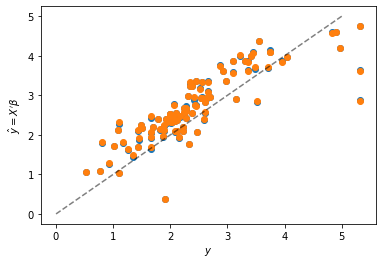

OLS MSE =  0.36523613354583234
Ridge MSE =  0.37075156697422346


In [143]:
y_test = df_test.loc[:, "medv"]
X_test = df_test.loc[:, [x for x in df_train.columns if x != "medv"]]

y_test /= y_test.std()
X_test.iloc[:, 1:] /= X_test.iloc[:, 1:].std(axis = 0) 

mdl = sm.OLS(y_train, X_train)

# MSE

mod_ols = mdl.fit()
err_ols = np.square(y_test - mod_ols.predict(X_test)).mean()

alpha = lambd * np.ones(len(mod_ols.params))
alpha[0] = 0.0   # not penalising the constant
mod_ridge = mdl.fit_regularized(alpha = alpha, L1_wt=0, start_params=mod_ols.params)
err_ridge = np.square(y_test - mod_ridge.predict(X_test)).mean()

fig, ax = plt.subplots()
ax.scatter(y_test, mod_ols.predict(X_test))
ax.scatter(y_test, mod_ridge.predict(X_test), color = "tab:orange")
ax.plot(range(6), range(6), linestyle = "--", color = "black", alpha = 0.5)
ax.set_xlabel(r"$y$")
ax.set_ylabel(r"$\hat{y} = X' \beta$")
plt.show()

print("OLS MSE = ", err_ols)
print("Ridge MSE = ", err_ridge)


Below is an illustration of what happens if we choose a much higher penalty parameter.

The ridge estimator will shrink all parameters (other than the non-penalised constant) towards zero:

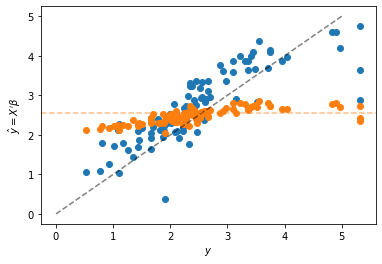

OLS MSE =  0.36523613354583234
Ridge MSE =  0.7593810888868701


In [149]:
alpha = 15 * np.ones(len(mod_ols.params))
alpha[0] = 0.0   # not penalising the constant
mod_ridge = mdl.fit_regularized(alpha = alpha, L1_wt=0, start_params=mod_ols.params)
err_ridge = np.square(y_test - mod_ridge.predict(X_test)).mean()

fig, ax = plt.subplots()
ax.scatter(y_test, mod_ols.predict(X_test))
ax.scatter(y_test, mod_ridge.predict(X_test), color = "tab:orange")
ax.plot(range(6), range(6), linestyle = "--", color = "black", alpha = 0.5)
ax.axhline(mod_ridge.params[0], color = "tab:orange", alpha = 0.5, linestyle = "--")
ax.set_xlabel(r"$y$")
ax.set_ylabel(r"$\hat{y} = X' \beta$")
plt.show()

print("OLS MSE = ", err_ols)
print("Ridge MSE = ", err_ridge)


As a final note: just because we use a linear model, this does not mean the relationship between our target $y$ and our predictor variables $X$ has to be linear. In the model:

$$\mathbb{E}[y|X] = X' \beta = \sum_{k=1}^K X_k \beta_k $$

the function is linear _in the parameters_, but we can include non-linear transformations of observed variables as covariates.

In the example below, we have $X = (1, Z, Z^2, Z^3)$ and 

$$\mathbb{E}[y|X] = \beta_0 + \beta_1 Z + \beta_2 Z^2 + \beta_3 Z^3$$



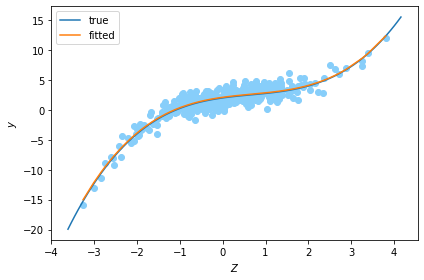

In [124]:
np.random.seed(523423)

n = 400
beta = np.array([2, 1, -1/2, 1/4])
e = np.random.standard_normal(n)
Z = np.random.standard_t(10, n)
X = np.column_stack((np.ones(n), Z, Z**2, Z**3))

y = X @ beta + e

betahat = np.linalg.solve(X.T @ X, X.T @ y)
yhat = X @ betahat

ind = np.argsort(Z)

fig, ax = plt.subplots()
ax.scatter(Z, y, color = "lightskyblue")
xmin, xmax = ax.get_xlim()
x = np.linspace(xmin, xmax, 100)
ax.plot(x, np.array([beta @ np.array([1, z, z**2, z**3]) for z in x]), label = "true")
ax.plot(Z[ind], yhat[ind], label = "fitted")
plt.xlabel(r"$Z$")
plt.ylabel(r"$y$")
plt.legend()
plt.tight_layout()
plt.show()